## Data Exploration 

In [2]:
# Import our dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# import mplcursors
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

### Connecting to PostgreSQL database

In [38]:
from sqlalchemy import create_engine
import db_credentials

In [39]:
# Using the database credentials
db_connection = db_credentials.db_credentials

In [40]:
# Accessing individual credentials from the dictionary of credentials
user = db_connection['user']
password = db_connection['password']
host = db_connection['host']
port = db_connection['port']
database = db_connection['database']

# Creating connection string
connection_str = f'postgresql://{user}:{password}@{host}:{port}/{database}'

# SQLAlchemy engine
engine = create_engine(connection_str)

# Test if the connection is made or not
try:
    with engine.connect() as connection_str:
        print('Successfully connected to the PostgreSQL database')
except Exception as ex:
    print(f'Sorry failed to connect: {ex}')

Successfully connected to the PostgreSQL database


### Query data from PostgreSQL and create a DataFrame 

In [41]:
# Establish a connection to the PostgreSQL database (This connection allows us to execute SQL querie)
conn = engine.connect()

# Execute SQL query
result = conn.execute('SELECT * FROM "AIDs_Classifications"')
        
# Fetch all rows from the result set
rows = result.fetchall()
        
# Convert result set to DataFrame
AIDS_df = pd.DataFrame(rows, columns=result.keys())
        
# Print the DataFrame
AIDS_df.head()

,ID,treatment,ZDV_only_treatment,off_treatment,time,age,weight,hemophilia,homosexual_activity,drugs,...,ZDV_last_30days,prior_ART_length,ART_history,ART_history_stratified,symptom,cd4_base,cd4_20wks,cd8_base,cd8_20wks,infected
0,0,2,1,0,948,48,89.8128,0,0,0,...,0,0,0,1,0,422,477,566,324,0
1,1,3,1,0,1002,61,49.4424,0,0,0,...,1,895,1,3,0,162,218,392,564,1
2,2,3,1,1,961,45,88.4520,0,1,1,...,1,707,1,3,0,326,274,2063,1893,0
3,3,3,1,0,1166,47,85.2768,0,1,0,...,1,1399,1,3,0,287,394,1590,966,0
4,4,0,0,0,1090,43,66.6792,0,1,0,...,1,1352,1,3,0,504,353,870,782,0


# Processing

In [4]:
# # Data can be extracted directly from CSV file located in Resources folder
AIDS_df = pd.read_csv('Resources/AIDS_Classifications_cleaned.csv')
AIDS_df.head()

,ID,treatment,ZDV_only_treatment,off_treatment,time,age,weight,hemophilia,homosexual_activity,drugs,...,ZDV_last_30days,prior_ART_length,ART_history,ART_history_stratified,symptom,cd4_base,cd4_20wks,cd8_base,cd8_20wks,infected
0,0,2,1,0,948,48,89.8128,0,0,0,...,0,0,0,1,0,422,477,566,324,0
1,1,3,1,0,1002,61,49.4424,0,0,0,...,1,895,1,3,0,162,218,392,564,1
2,2,3,1,1,961,45,88.4520,0,1,1,...,1,707,1,3,0,326,274,2063,1893,0
3,3,3,1,0,1166,47,85.2768,0,1,0,...,1,1399,1,3,0,287,394,1590,966,0
4,4,0,0,0,1090,43,66.6792,0,1,0,...,1,1352,1,3,0,504,353,870,782,0


In [5]:
# Determine the number of unique values in each column.
AIDS_df.nunique()

ID                        2139
treatment                    4
ZDV_only_treatment           2
off_treatment                2
time                       713
age                         59
weight                     667
hemophilia                   2
homosexual_activity          2
drugs                        2
race                         2
gender                       2
karnofsky_score              4
therapy_prior                2
ZDV_last_30days              2
prior_ART_length           813
ART_history                  2
ART_history_stratified       3
symptom                      2
cd4_base                   484
cd4_20wks                  570
cd8_base                  1090
cd8_20wks                 1050
infected                     2
dtype: int64

In [6]:
AIDS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2139 non-null   int64  
 1   treatment               2139 non-null   int64  
 2   ZDV_only_treatment      2139 non-null   int64  
 3   off_treatment           2139 non-null   int64  
 4   time                    2139 non-null   int64  
 5   age                     2139 non-null   int64  
 6   weight                  2139 non-null   float64
 7   hemophilia              2139 non-null   int64  
 8   homosexual_activity     2139 non-null   int64  
 9   drugs                   2139 non-null   int64  
 10  race                    2139 non-null   int64  
 11  gender                  2139 non-null   int64  
 12  karnofsky_score         2139 non-null   int64  
 13  therapy_prior           2139 non-null   int64  
 14  ZDV_last_30days         2139 non-null   

In [7]:
# Describe the data set
AIDS_df.describe()

,ID,treatment,ZDV_only_treatment,off_treatment,time,age,weight,hemophilia,homosexual_activity,drugs,...,ZDV_last_30days,prior_ART_length,ART_history,ART_history_stratified,symptom,cd4_base,cd4_20wks,cd8_base,cd8_20wks,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,1069.000000,1.520804,0.751286,0.362786,879.098177,35.248247,75.125311,0.084151,0.661057,0.131370,...,0.550257,379.175783,0.585788,1.979897,0.172978,350.501169,371.307153,986.627396,935.369799,0.243572
std,617.620434,1.127890,0.432369,0.480916,292.274324,8.709026,13.263164,0.277680,0.473461,0.337883,...,0.497584,468.657526,0.492701,0.899053,0.378317,118.573863,144.634909,480.197750,444.976051,0.429338
min,0.000000,0.000000,0.000000,0.000000,14.000000,12.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,534.500000,1.000000,1.000000,0.000000,727.000000,29.000000,66.679200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,1069.000000,2.000000,1.000000,0.000000,997.000000,34.000000,74.390400,0.000000,1.000000,0.000000,...,1.000000,142.000000,1.000000,2.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1603.500000,3.000000,1.000000,1.000000,1091.000000,40.000000,82.555200,0.000000,1.000000,0.000000,...,1.000000,739.500000,1.000000,3.000000,0.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,2138.000000,3.000000,1.000000,1.000000,1231.000000,70.000000,159.939360,1.000000,1.000000,1.000000,...,1.000000,2851.000000,1.000000,3.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [46]:
# Categorical data
cat_cols= ["treatment", "ZDV_only_treatment","off_treatment","hemophilia", "homosexual_activity", "drugs", "race",\
           "gender", "karnofsky_score","therapy_prior","ZDV_last_30days","ART_history","ART_history_stratified", "symptom"]

<Figure size 2000x1500 with 0 Axes>

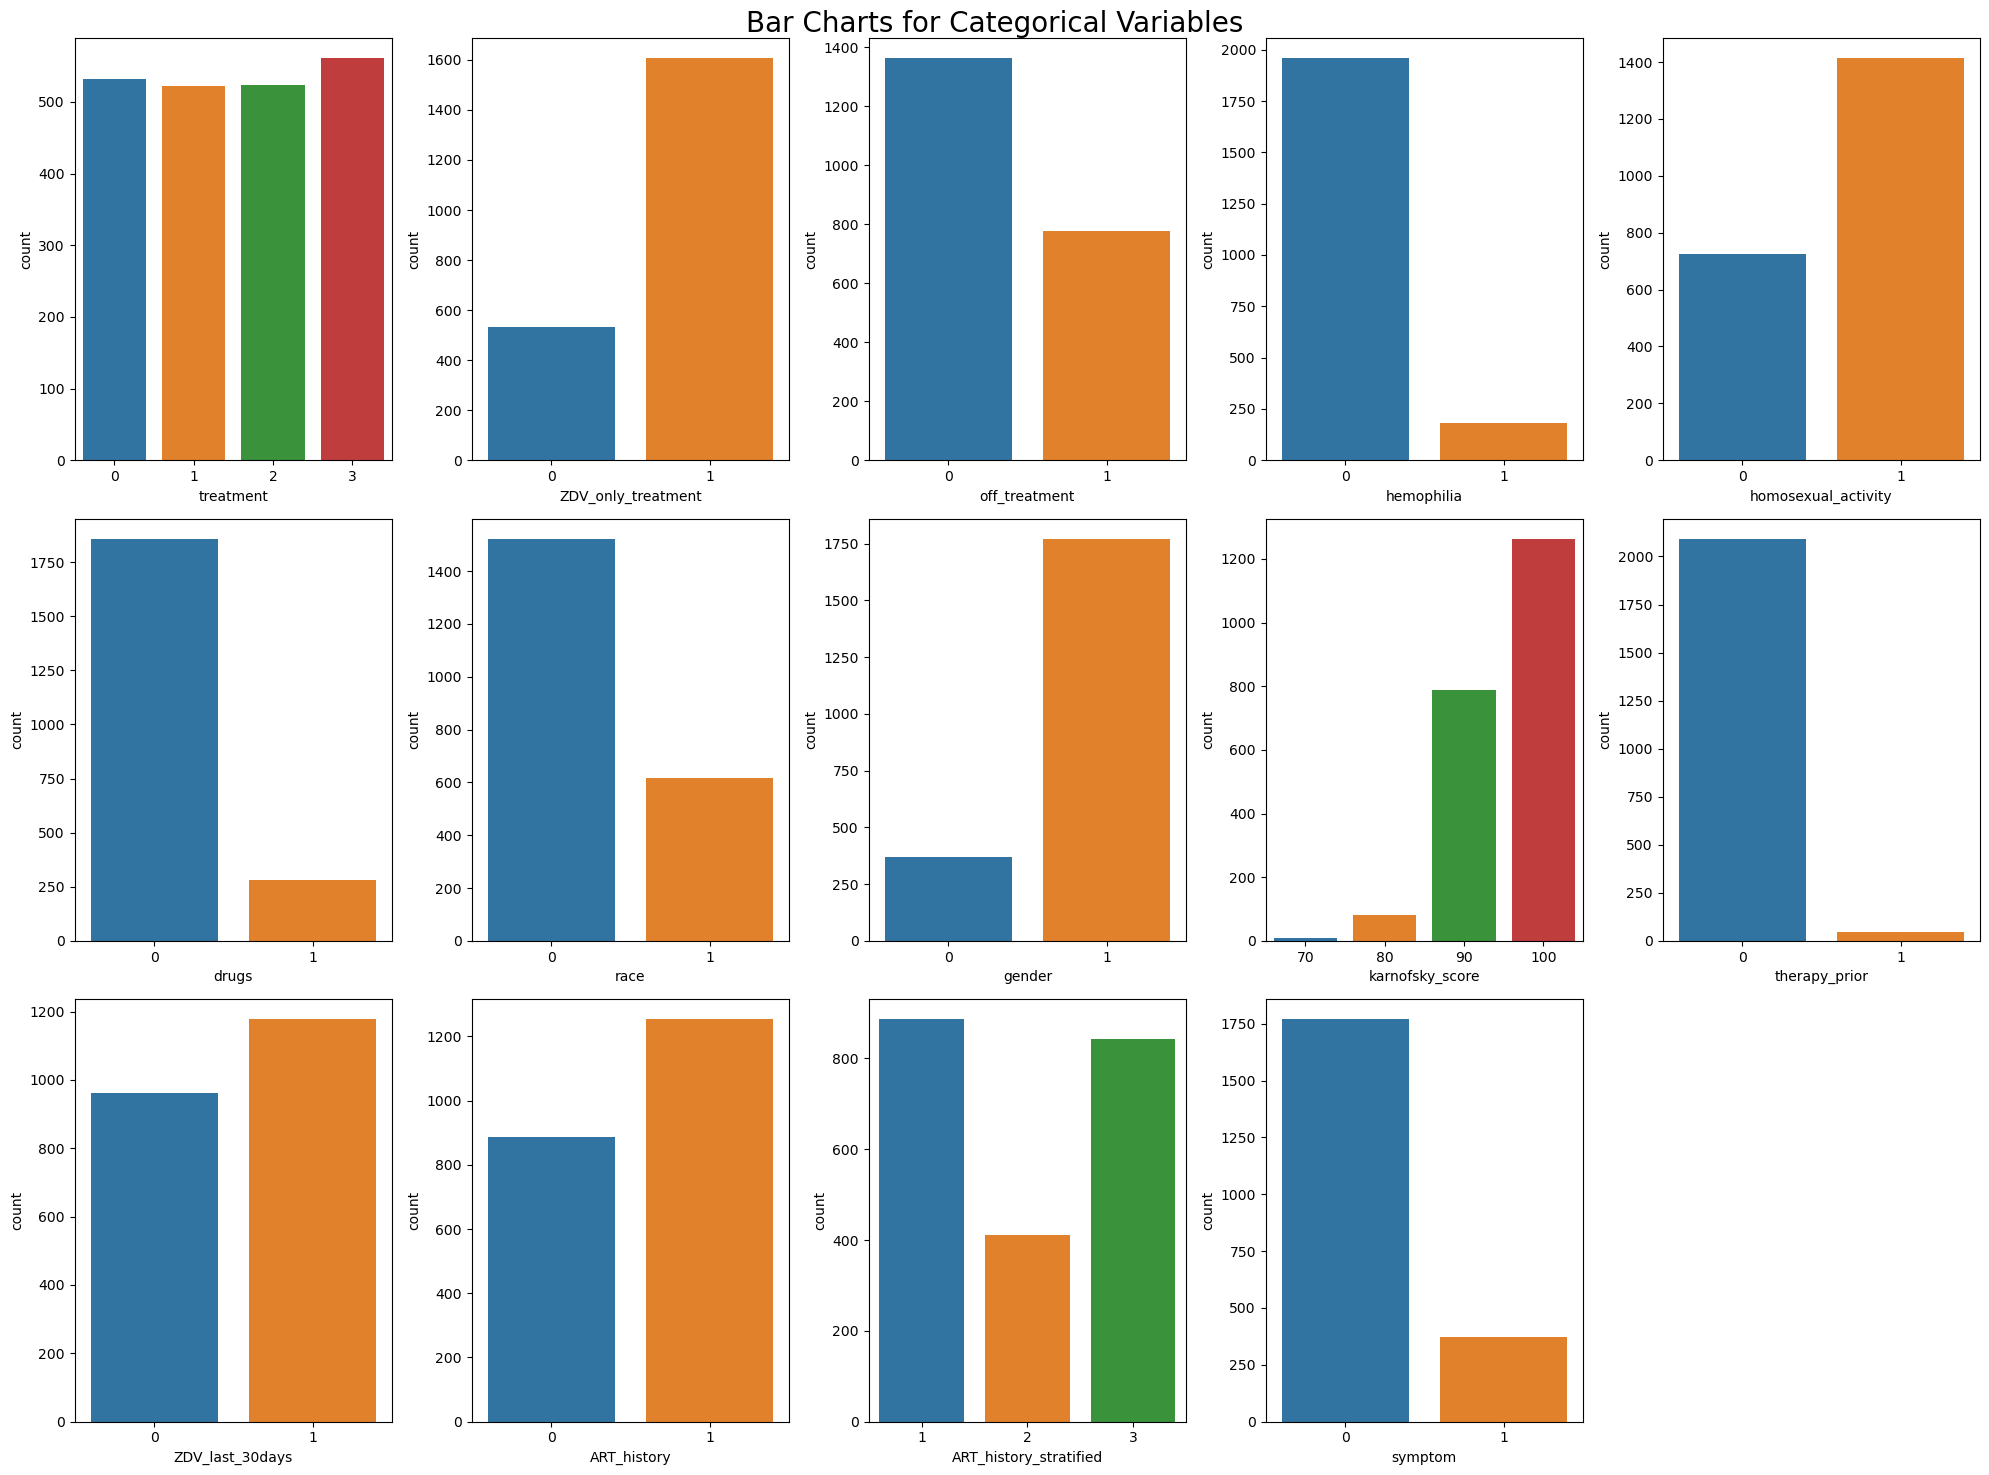

In [47]:
# Find out distribution of categorical data
plt.figure(figsize = (20,15))
plotnumber=1

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 16:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=column, data=AIDS_df)
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Bar Charts for Categorical Variables', fontsize=20)  # Adding title
plt.tight_layout()
plt.show()

In [10]:
# Numerical variables
num_cols = ["time", "age", "weight", "prior_ART_length","cd4_base", "cd4_20wks"]

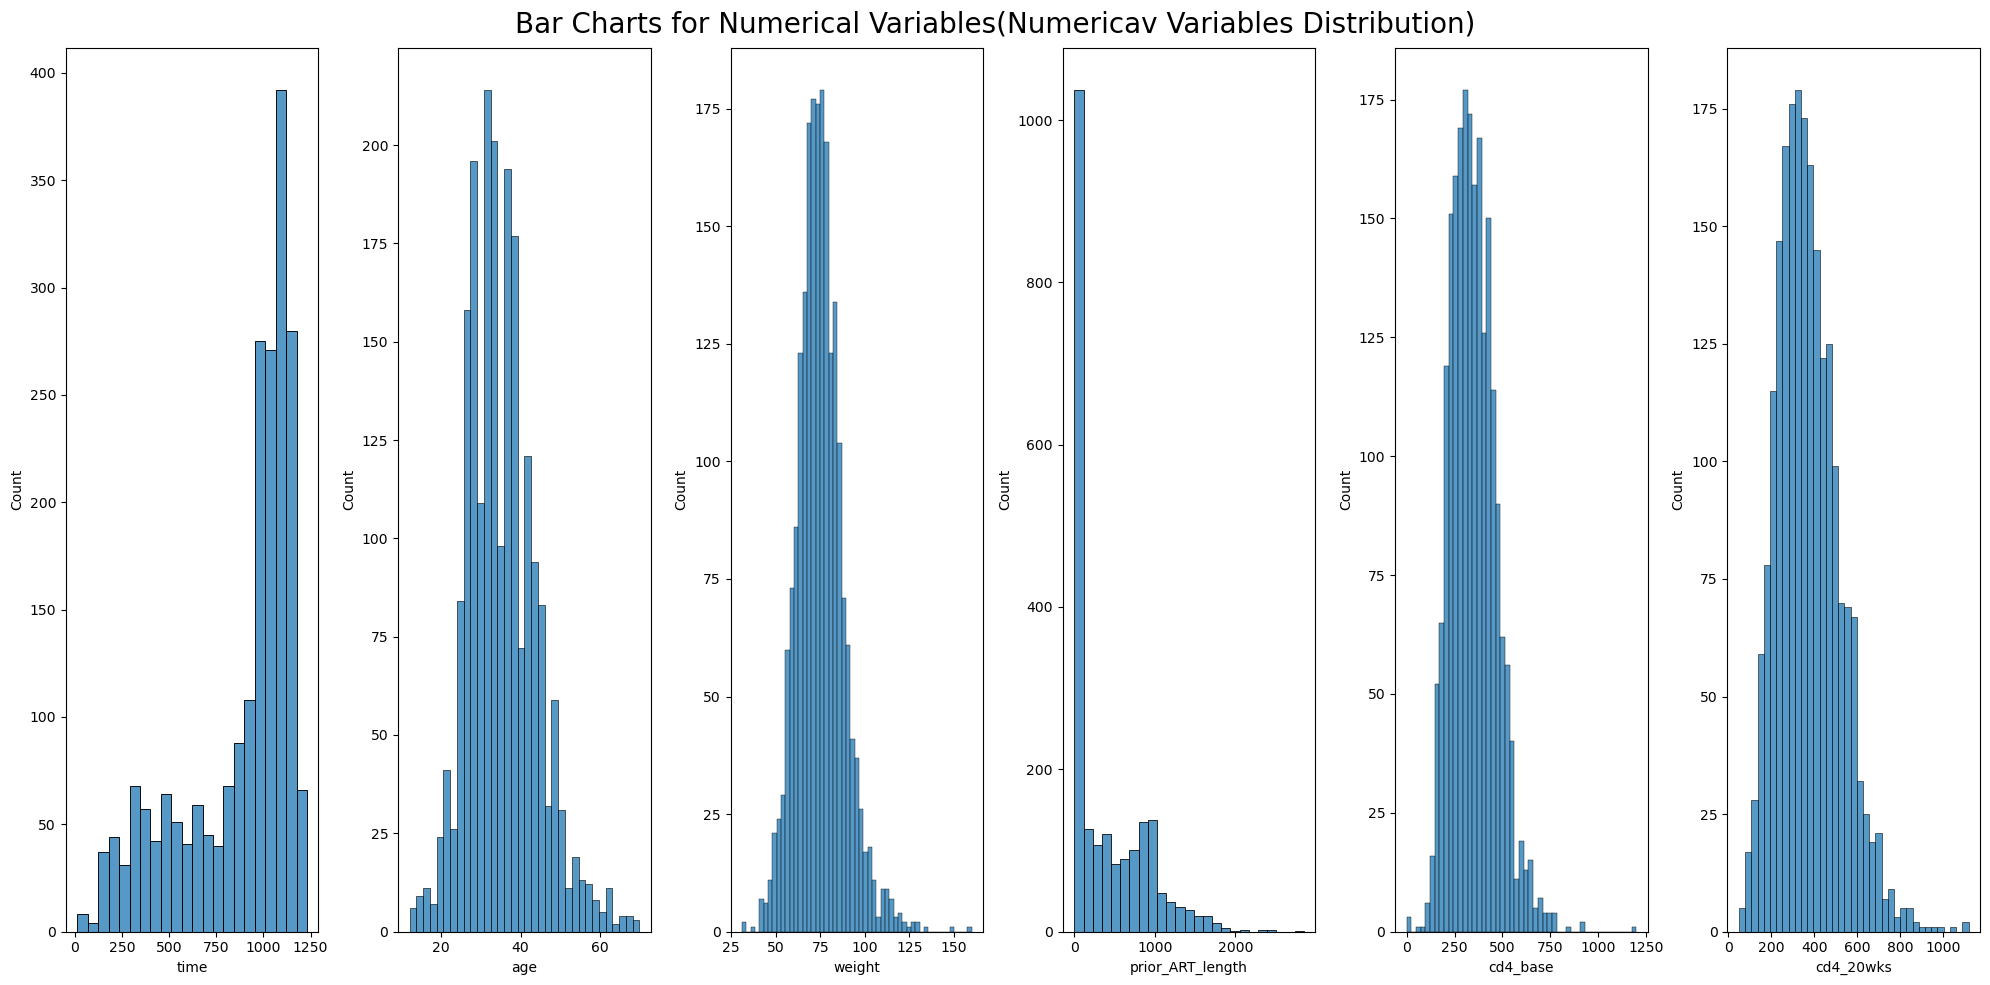

In [49]:
# Find out distribution of numerical veriables
plt.figure(figsize = (20,10))
plotnumber=1

for column in num_cols:
    if plotnumber<= 8:
        ax = plt.subplot(1,6, plotnumber)
        sns.histplot(AIDS_df[column])
        plt.xlabel(column)
        
    plotnumber +=1
plt.suptitle('Bar Charts for Numerical Variables(Numericav Variables Distribution)', fontsize=20)  # Adding title
plt.tight_layout()
plt.show() 

In [50]:
# There are significantly more '0's than '1's
infected_count = AIDS_df["infected"].value_counts()
infected_count

infected
0    1618
1     521
Name: count, dtype: int64

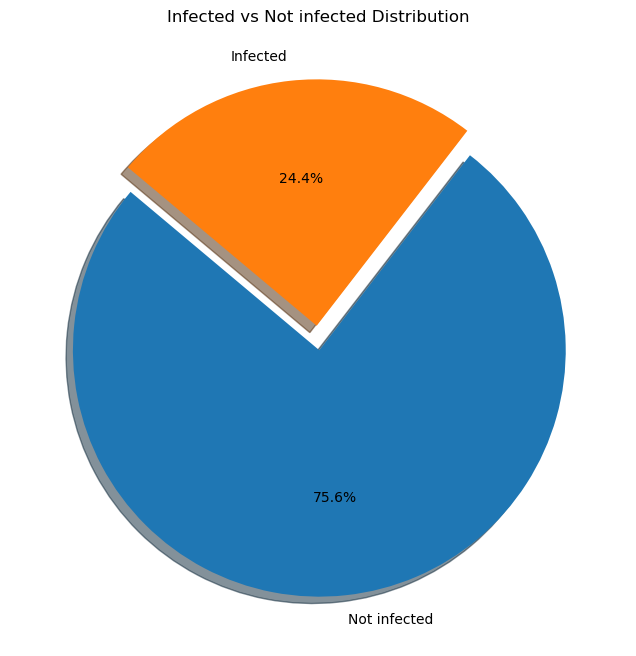

In [51]:
# plot the pie chart for infected vs not infected samples
plt.figure(figsize=(8,8))
plt.pie(infected_count, shadow=True, labels=["Not infected", "Infected"], autopct='%1.1f%%', startangle=140, explode=[0.05,0.05])
plt.title('Infected vs Not infected Distribution')
plt.show()

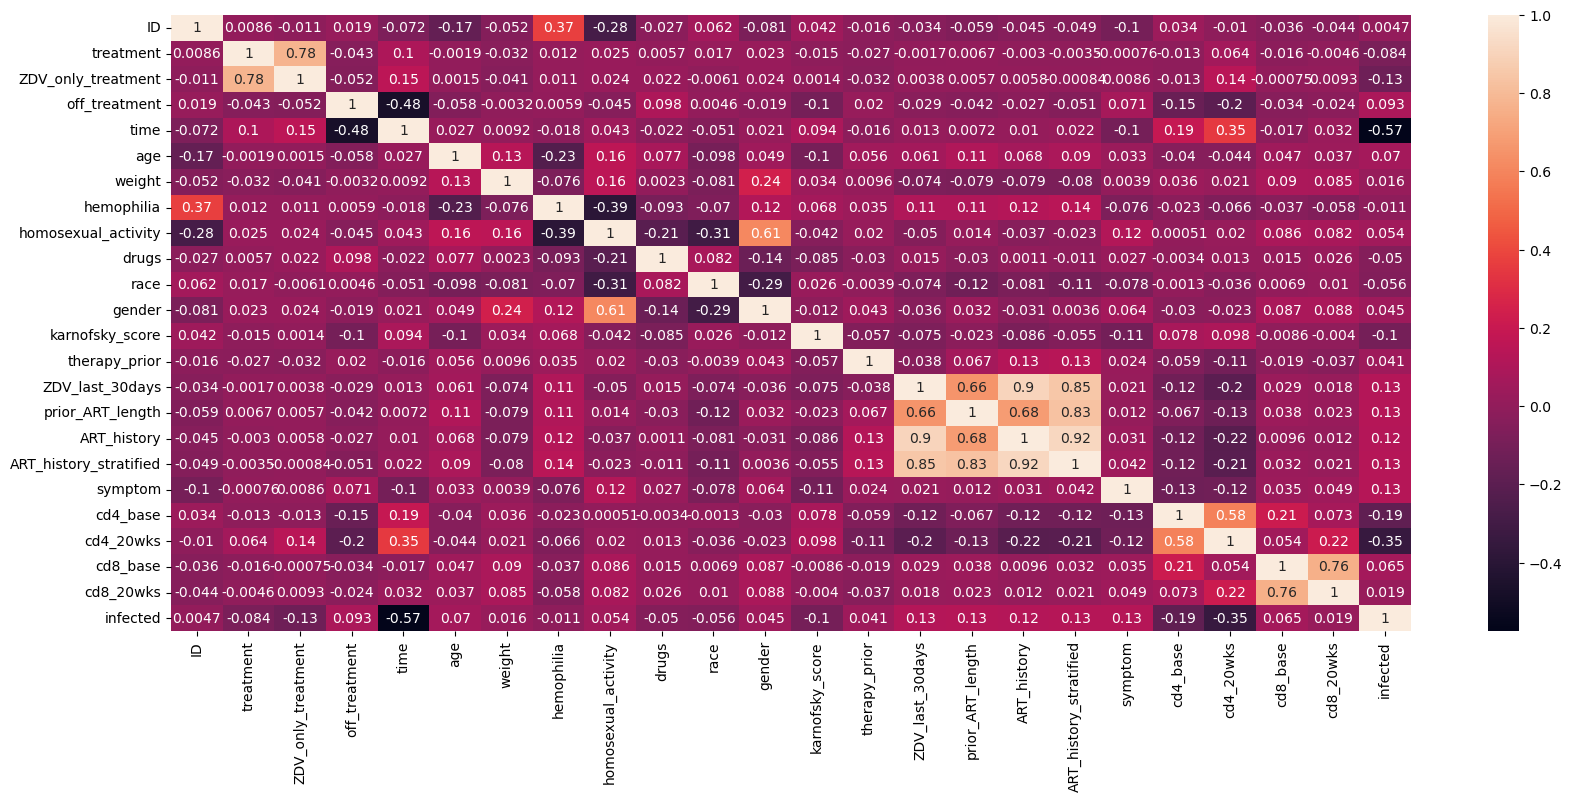

In [8]:
# Relationship Matrix

plt.figure(figsize = (20,8))
sns.heatmap(AIDS_df.corr() , annot = True)
plt.show()

# Some of the key correlations in the matrix:

Treatment and ZDV_only_treatment: Correlation: 0.78
This indicates a strong positive correlation, suggesting that individuals who receive treatment are likely to be on ZDV-only treatment. This could imply that ZDV is a primary component of the treatment regimen in your dataset.

Gender and Homosexual Activity: Correlation: 0.61
This indicates a strong positive correlation. It suggests that there is a significant association between gender and homosexual activity. Specifically, one gender (most likely male, considering common datasets on HIV/AIDS) may report higher instances of homosexual activity. This could be relevant in studies of HIV transmission patterns.

cd4_base and cd4_20wks: Correlation: 0.58
This strong positive correlation indicates that baseline CD4 counts are a good predictor of CD4 counts at 20 weeks, suggesting consistency in immune function over this period.

prior_ART_length and ART_history:Correlation: 0.68
A strong positive correlation between prior ART length and ART history suggests that individuals with longer ART histories tend to have longer durations of prior ART treatment.

ART_history and ART_history_stratified: Correlation: 0.92
A very strong correlation, indicating that these two variables are likely measuring very similar aspects of ART history, possibly just stratified or categorized differently.

Time and Infected: Correlation: -0.57
This strong negative correlation indicates that as time increases, the likelihood of being infected decreases. This might suggest that over time, patients are responding well to treatment or preventive measures.

Age and Hemophilia: Correlation: -0.23
This indicates a weak negative correlation. It suggests that as age increases, the likelihood of having hemophilia slightly decreases. This relationship is relatively weak, but it could indicate that hemophilia might be more prevalent among younger individuals in this dataset.


## Strong Correlations:

Variables with very strong correlations (like ART_history and ART_history_stratified) are likely measuring similar constructs and might be redundant in some analyses.
Treatment and ZDV_only_treatment have a strong correlation, indicating a significant overlap which should be considered when analyzing treatment effects.

## Moderate Correlations:

Variables like gender and Homosexual Activity, age and hemophilia have moderate correlations, suggesting potential areas of interest for more detailed analysis but not necessarily indicative of strong linear relationships.

## Negative Correlations:

The negative correlation between time and infected suggests that the duration of treatment or study might be protective or associated with lower infection rates.

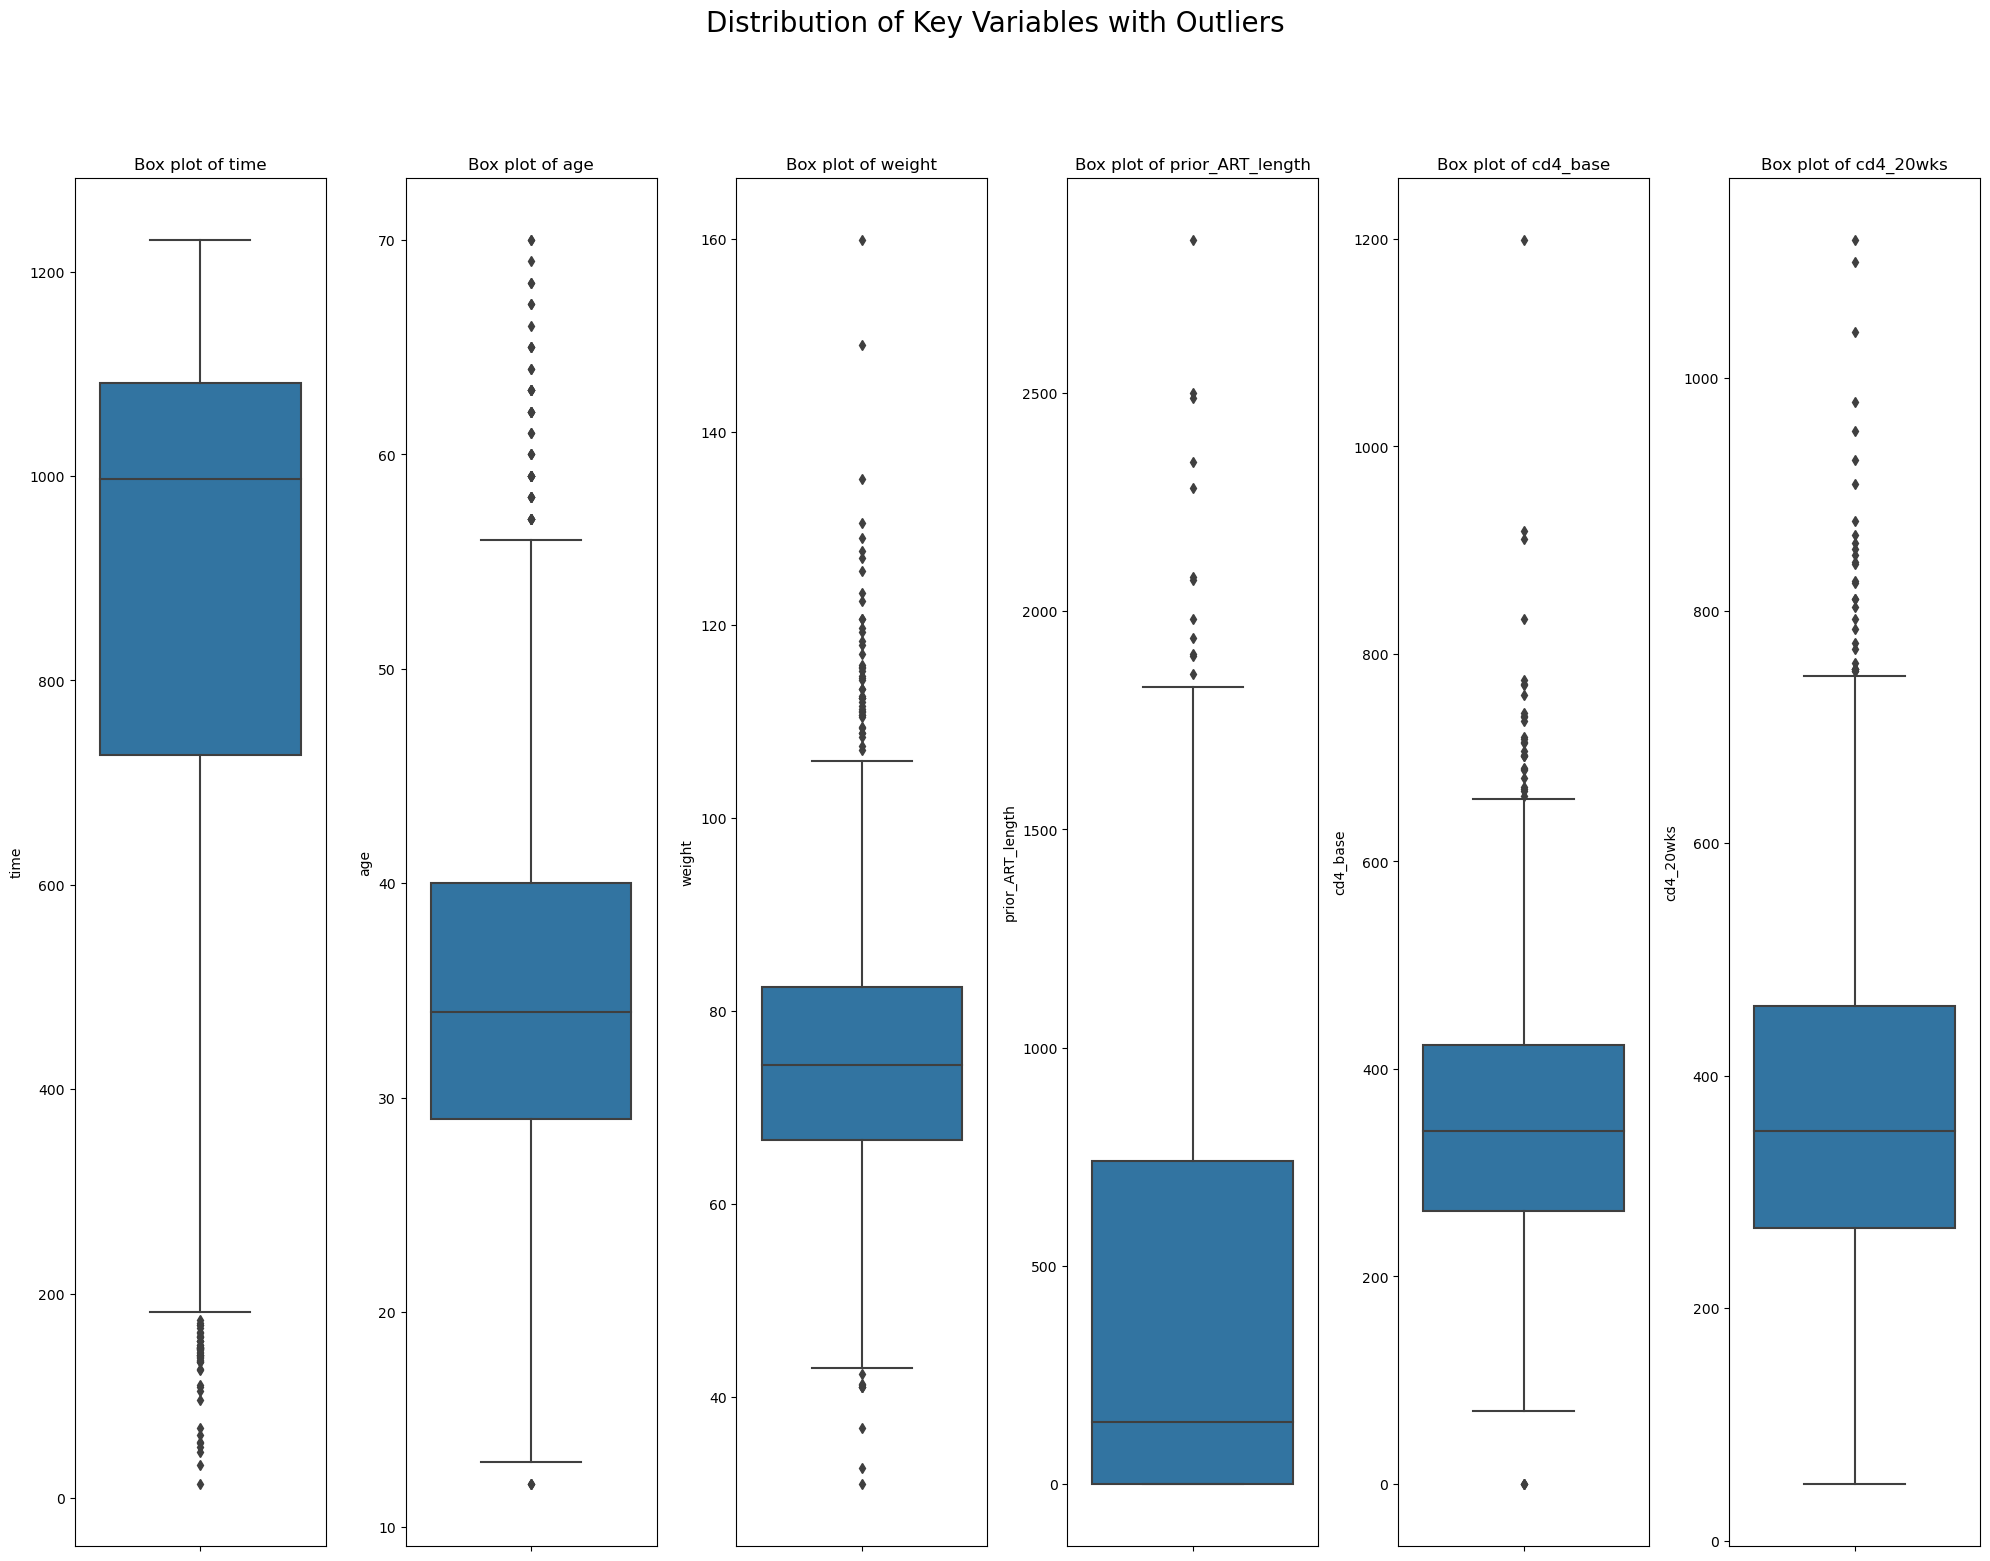

In [14]:
#  to check the outliers in th dataset

numerical_cols = AIDS_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, len(num_cols) * 5))
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols), i)
    sns.boxplot(y=AIDS_df[column])
    plt.title(f'Box plot of {column}')
    
    # Adding a main title to the entire figure
plt.suptitle('Distribution of Key Variables with Outliers', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Identifying outliers is crucial for understanding anomalies in the dataset. These points can significantly affect statistical analyses and should be examined further to determine if they are data entry errors, or natural variations. e.g. in Age variable we have younger patient (12 yrs) maximum weight for a patient is 160kg.